# 자동차 리콜 데이터 분석

---

## 프로젝트 목표
- 한국교통안전공단 자동차 결함 리콜 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

---

## 프로젝트 목차
1. **데이터 읽기:** 자동차 리콜 데이터를 불러오고 Dataframe 구조를 확인<br>
    1.1. 데이터 불러오기<br>
<br> 
2. **데이터 정제:** 결측치 확인 및 기초적인 데이터 변형<br>
    2.1. 결측치 확인<br>
    2.2. 중복값 확인<br>
    2.3. 기초적인 데이터 변형<br>
<br>
3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악<br>
    3.1. 제조사별 리콜 현황 출력<br>
    3.2. 모델별 리콜 현황 출력<br>
    3.3. 월별 리콜 현황 출력<br>
    3.4. 생산연도별 리콜 현황 출력<br>
    3.5. 4분기 제조사별 리콜 현황 출력<br>
    3.6. 하반기 생산연도별 리콜 현황 출력<br>
    3.7. 워드 클라우드를 이용한 리콜 사유 시각화<br>

---

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

---

## 1. 데이터 읽기

### 1.1. 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
!pip install seaborn==0.9.0
import seaborn as sns
print(sns.__version__)
# missingno라는 라이브러리가 설치되어 있을 경우 import
try: 
    import missingno as msno
# missingno라는 라이브러리가 설치되어 있지 않을 경우 설치 후 import
except: 
    !pip install missingno
    import missingno as msno

     |████████████████████████████████| 208 kB 1.7 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
0.9.0


In [60]:
# pd.read_csv를 통하여 dataframe 형태로 읽어오기
df = pd.read_csv("./data/한국교통안전공단_자동차결함 리콜현황_20201231.csv", encoding="euc-kr")

In [3]:
# 상위 5개 데이터를 출력
df.head()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [4]:
# 상위 10개 데이터를 출력
df.head(10)

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
5,만트럭버스코리아(주),TGS 카고,2016-04-11,2016-07-21,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
6,만트럭버스코리아(주),TGS 카고,2016-04-29,2016-04-29,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
7,만트럭버스코리아(주),TGS 카고,2015-03-25,2016-04-01,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
8,만트럭버스코리아(주),TGX 트랙터,2015-03-25,2016-07-04,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
9,만트럭버스코리아(주),TGX 트랙터,2015-05-05,2016-09-15,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...


In [5]:
# 하위 5개 데이터를 출력
df.tail()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
1270,한국닛산(주),INFINITI M30,2012-02-06,2012-02-06,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1271,한국닛산(주),INFINITI M30d,2012-07-18,2013-06-28,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1272,한국닛산(주),INFINITI Q70 3.0d,2013-09-18,2015-06-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1273,한국닛산(주),INFINITI M56,2010-05-25,2011-11-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1274,한국닛산(주),INFINITI Q70 5.6,2014-04-08,2014-04-08,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.


In [6]:
# dataframe 정보를 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제작자     1275 non-null   object
 1   차명      1275 non-null   object
 2   생산기간    1275 non-null   object
 3   생산기간.1  1275 non-null   object
 4   리콜개시일   1275 non-null   object
 5   리콜사유    1275 non-null   object
dtypes: object(6)
memory usage: 59.9+ KB


---

## 2. 데이터 정제

* 결측값(missing data), 중복값(duplicates) 처리
* 열 이름 변경

### 2.1. 결측치 확인

`missingno.matrix()` : 결측치 시각화

In [7]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

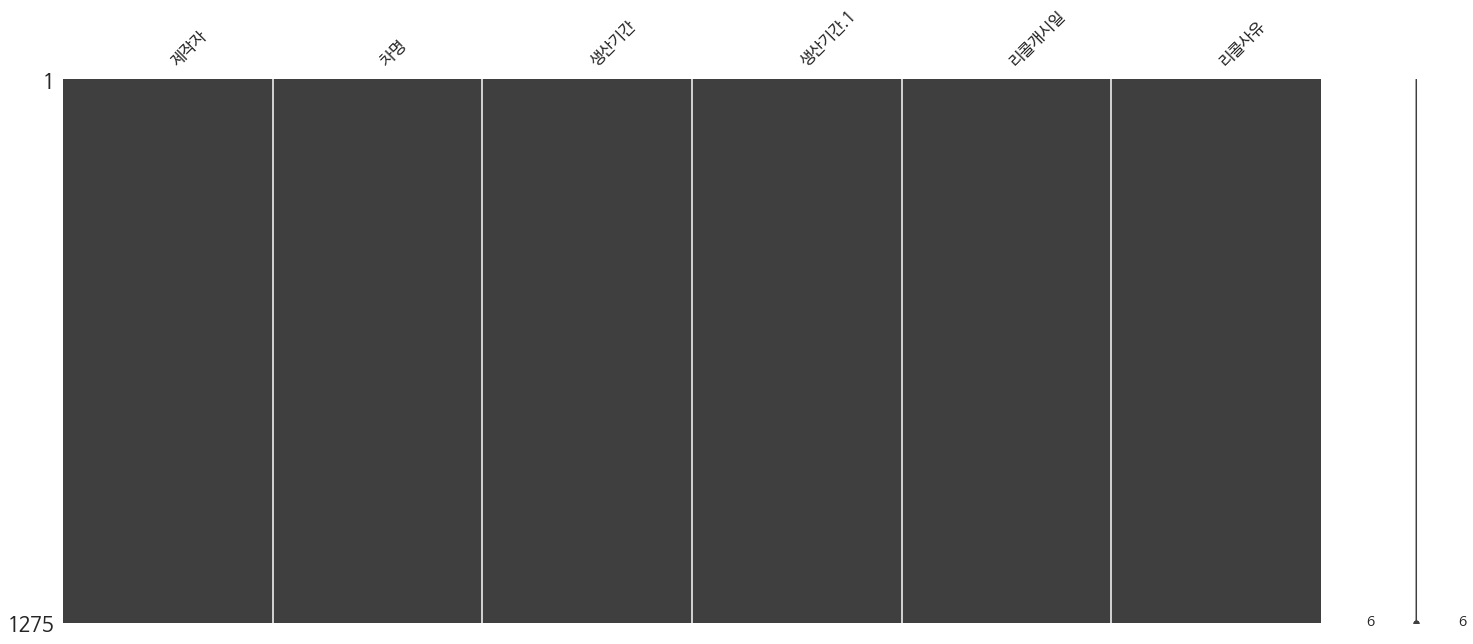

In [8]:
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False})
msno.matrix(df)
plt.show()

`isna()` : 결측치 확인

In [14]:
# 각 열 별로 결측치의 갯수를 반환 (True:1, False:0)
df.isna().sum() 

제작자       0
차명        0
생산기간      0
생산기간.1    0
리콜개시일     0
리콜사유      0
dtype: int64

### 2.2. 중복값 확인

`duplicated()` : 중복값 확인

In [10]:
df[df.duplicated(keep=False)]

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...


In [11]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

`drop_duplicates()` : 중복값 제거

In [61]:
df.drop_duplicates().head()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [13]:
print("Before:", len(df))
df = df.drop_duplicates()
print("After:", len(df))

Before: 1275
After: 1274


---

#### Step by step

In [30]:
df_d = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})

In [31]:
df_d

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


#### duplicated()

In [37]:
df_d.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [39]:
df_d.duplicated(keep = 'first')  # default

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [41]:
df_d.duplicated(keep = 'last')

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [42]:
df_d.duplicated(keep = False)

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [43]:
df_d.duplicated(subset=['brand']) 

0    False
1     True
2    False
3     True
4     True
dtype: bool

#### drop_duplicates()

* default : remove duplicate rows based on all columns.
* subset :  remove duplicates on specific columns.
*  keep :  remove duplicates and keep last occurrences.

In [32]:
df_d.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [35]:
df_d.drop_duplicates(subset=['brand'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


In [36]:
df_d.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


---

### 2.3. 기초적인 데이터 변형

+ 현재 `생산기간`, `생산기간.1`, `리콜개시일` 열은 모두 `object` 타입<br> --> 문자열로 인식되고 있으므로 분석을 위해 연도, 월, 일을 각각 정수형으로 저장한다. <br>
+ 열 이름을 영어로 바꿔준다.

In [62]:
def parse_year(s):
    return int(s[:4])
def parse_month(s):
    return int(s[5:7])
def parse_day(s):
    return int(s[8:])

# Pandas DataFrame에서는 row별로 loop를 도는 것이 굉장히 느리기 때문에, apply() 함수를 이용하여 벡터 연산을 진행한다.
df['start_year'] = df['생산기간'].apply(parse_year)
df['start_month'] = df['생산기간'].apply(parse_month)
df['start_day'] = df['생산기간'].apply(parse_day)

df['end_year'] = df['생산기간.1'].apply(parse_year)
df['end_month'] = df['생산기간.1'].apply(parse_month)
df['end_day'] = df['생산기간.1'].apply(parse_day)

df['recall_year'] = df['리콜개시일'].apply(parse_year)
df['recall_month'] = df['리콜개시일'].apply(parse_month)
df['recall_day'] = df['리콜개시일'].apply(parse_day)

df.head(3)

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23


In [63]:
# 불필요한 열은 버리고, 열 이름을 재정의합니다.
df = df.drop(columns=['생산기간', '생산기간.1', '리콜개시일']).rename(columns={'제작자': "manufacturer", "차명": "model", "리콜사유": "cause"})
df.head(3)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23


본 분석에서는 2020년의 데이터만을 대상으로하므로, 그 외의 데이터가 있다면 삭제한다.

In [64]:
# 2019년의 데이터가 함께 존재함을 알 수 있음
df.recall_year.min(), df.recall_year.max()

(2019, 2020)

In [65]:
# 2020년 데이터만 저장한다.
df = df[df['recall_year']==2020]
len(df)

1264

#### Step by step

In [52]:
def parse_year(s):
    return int(s[:4])

def parse_month(s):
    return int(s[5:7])

def parse_day(s):
    return int(s[8:])

In [53]:
parse_year('2021-04-12')

2021

---

## 3. 데이터 시각화

### 3.1. 제조사별 리콜 현황 출력

제조사별 리콜 건수 분포를 막대 그래프로 확인

In [19]:
df.groupby("manufacturer").count()["model"].sort_values(ascending=False)

manufacturer
비엠더블유코리아(주)           526
메르세데스벤츠코리아(주)         234
아우디폭스바겐코리아(주)         115
한불모터스(주)               71
한국토요타자동차(주)            54
(주)볼보자동차코리아            39
현대자동차(주)               28
기아자동차(주)               19
(주) 한국모터트레이딩           16
한국지엠주식회사               15
포드세일즈서비스코리아(유)         14
화창상사(주)                14
다임러트럭코리아(주)            13
(주) 바이크코리아             12
만트럭버스코리아(주)            11
혼다코리아(주)               10
(주)에프엠케이                9
에프씨에이코리아(주)             7
(주)재규어랜드로버코리아           7
한국닛산(주)                 7
대전기계공업(주)               6
르노삼성자동차(주)              6
포르쉐코리아 주식회사             5
유한회사 모토로싸               4
(주)스포츠모터사이클코리아          4
기흥인터내셔널 유한회사            4
허스크바나모터싸이클코리아 주식회사      3
쌍용자동차(주)                3
(주)에이비케이                2
(주) 다빈월드                1
지엠아시아퍼시픽지역본부 주식회사       1
아이씨피(주)                 1
(주)스즈키씨엠씨               1
스카니아코리아그룹(주)            1
Name: model, dtype: int64

In [27]:
pd.DataFrame(df.groupby("manufacturer").count()["model"].sort_values(ascending=False)).rename(columns={"model": "count"})

,count
manufacturer,
비엠더블유코리아(주),526
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54
(주)볼보자동차코리아,39
현대자동차(주),28
기아자동차(주),19
(주) 한국모터트레이딩,16


> `count`가 `manufacturer`보다 상단에 있다는 것은
> `manufacturer`가 현재 columns name이 아닌 **index**로 인식되고 있다는 것을 의미한다.

In [55]:
tmp = pd.DataFrame(df.groupby("manufacturer").count()["model"].sort_values(ascending=False)).rename(columns={"model": "count"})
tmp

,count
manufacturer,
비엠더블유코리아(주),526
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54
(주)볼보자동차코리아,39
현대자동차(주),28
기아자동차(주),19
(주) 한국모터트레이딩,16


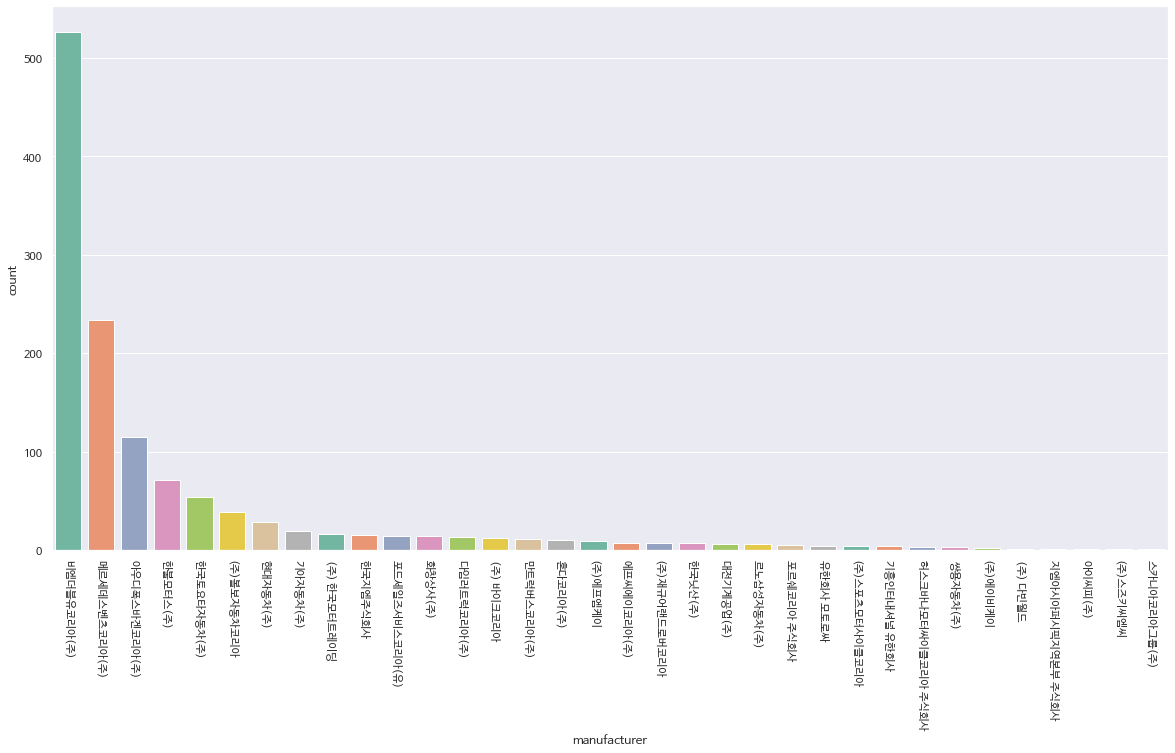

In [56]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="manufacturer", data=df, palette="Set2", order=tmp.index)
plt.xticks(rotation=270)
plt.show()

In [57]:
tmp.index

Index(['비엠더블유코리아(주)', '메르세데스벤츠코리아(주)', '아우디폭스바겐코리아(주)', '한불모터스(주)',
       '한국토요타자동차(주)', '(주)볼보자동차코리아', '현대자동차(주)', '기아자동차(주)', '(주) 한국모터트레이딩',
       '한국지엠주식회사', '포드세일즈서비스코리아(유)', '화창상사(주)', '다임러트럭코리아(주)', '(주) 바이크코리아',
       '만트럭버스코리아(주)', '혼다코리아(주)', '(주)에프엠케이', '에프씨에이코리아(주)', '(주)재규어랜드로버코리아',
       '한국닛산(주)', '대전기계공업(주)', '르노삼성자동차(주)', '포르쉐코리아 주식회사', '유한회사 모토로싸',
       '(주)스포츠모터사이클코리아', '기흥인터내셔널 유한회사', '허스크바나모터싸이클코리아 주식회사', '쌍용자동차(주)',
       '(주)에이비케이', '(주) 다빈월드', '지엠아시아퍼시픽지역본부 주식회사', '아이씨피(주)', '(주)스즈키씨엠씨',
       '스카니아코리아그룹(주)'],
      dtype='object', name='manufacturer')

#### Step by step
* output

In [67]:
tmp = pd.DataFrame(df.groupby('manufacturer').count()['model'].sort_values(ascending=False)).rename(columns={'model':'count'})
tmp.head()

,count
manufacturer,
비엠더블유코리아(주),527
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54


#### Step by step

In [70]:
df.head(4)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23
3,한국토요타자동차(주),토요타 캠리,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,23,2019,9,6,2020,1,23


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   manufacturer  1264 non-null   object
 1   model         1264 non-null   object
 2   cause         1264 non-null   object
 3   start_year    1264 non-null   int64 
 4   start_month   1264 non-null   int64 
 5   start_day     1264 non-null   int64 
 6   end_year      1264 non-null   int64 
 7   end_month     1264 non-null   int64 
 8   end_day       1264 non-null   int64 
 9   recall_year   1264 non-null   int64 
 10  recall_month  1264 non-null   int64 
 11  recall_day    1264 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 128.4+ KB


In [72]:
df.groupby('manufacturer').count().head(4)

,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
manufacturer,,,,,,,,,,,
(주) 다빈월드,1,1,1,1,1,1,1,1,1,1,1
(주) 바이크코리아,12,12,12,12,12,12,12,12,12,12,12
(주) 한국모터트레이딩,16,16,16,16,16,16,16,16,16,16,16
(주)볼보자동차코리아,39,39,39,39,39,39,39,39,39,39,39


In [75]:
df.groupby('manufacturer').count()["model"][0:5]

manufacturer
(주) 다빈월드         1
(주) 바이크코리아      12
(주) 한국모터트레이딩    16
(주)볼보자동차코리아     39
(주)스즈키씨엠씨        1
Name: model, dtype: int64

In [76]:
df.groupby('manufacturer').count()["model"].sort_values(ascending=False)[0:5]

manufacturer
비엠더블유코리아(주)      527
메르세데스벤츠코리아(주)    234
아우디폭스바겐코리아(주)    115
한불모터스(주)          71
한국토요타자동차(주)       54
Name: model, dtype: int64

In [77]:
pd.DataFrame(df.groupby('manufacturer').count()["model"].sort_values(ascending=False)).head(5)

,model
manufacturer,
비엠더블유코리아(주),527
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54


In [78]:
pd.DataFrame(df.groupby('manufacturer').count()["model"].sort_values(ascending=False)).rename(columns={'model':'count'}).head(5)

,count
manufacturer,
비엠더블유코리아(주),527
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54


### 3.2. 모델별 리콜 현황 출력

차량 모델별 리콜 건수 분포를 막대 그래프로 확인

In [79]:
pd.DataFrame(df.groupby("model").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"}).head(10)

,count
model,
BMW 320d,15
BMW 520d,15
BMW X3 xDrive20d,11
BMW 520d xDrive,10
BMW 320d Gran Turismo,9
BMW X6 xDrive30d,9
MINI Cooper D,8
BMW 320d xDrive Gran Turismo,8
BMW X5 xDrive30d,8


상위 50개 모델만 뽑아서 시각화

In [80]:
tmp = pd.DataFrame(df.groupby("model").count()["manufacturer"].sort_values(ascending=False))
tmp = tmp.rename(columns={"manufacturer": "count"}).iloc[:50]

In [81]:
len(tmp)

50

* 1

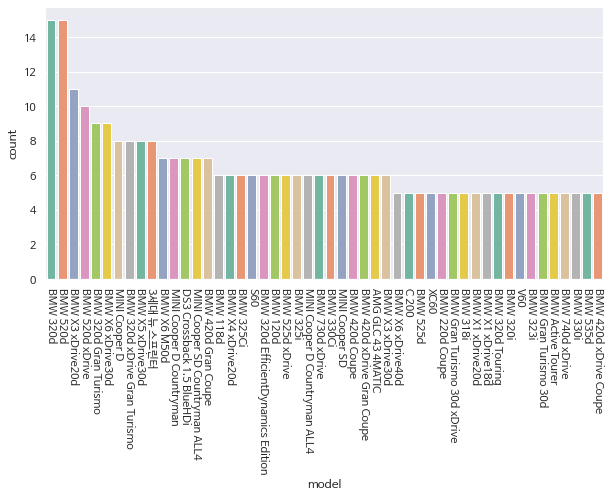

In [82]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="model", data=df[df.model.isin(tmp.index)], palette="Set2", order=tmp.index)
plt.xticks(rotation=270)
plt.show()

* 2

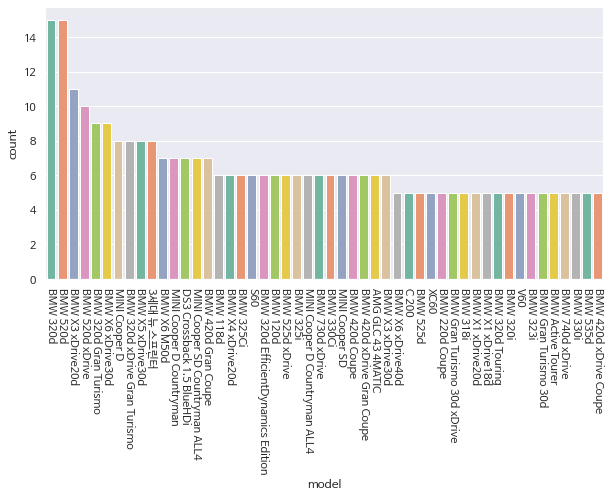

In [83]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="model", data=df[df.model.isin(tmp.index)], palette="Set2", order=tmp.index)
plt.xticks(rotation=270)
plt.show()

2020년에 전체적으로 BMW 모델이 많이 리콜되었음을 확인할 수 있음

### 3.3. 월별 리콜 현황 출력

월별 리콜 건수 분포를 막대 그래프로 확인

In [93]:
pd.DataFrame(df.groupby("recall_month").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"})

,count
recall_month,
8,221
10,161
6,155
12,116
4,114
2,108
3,108
9,72
5,68


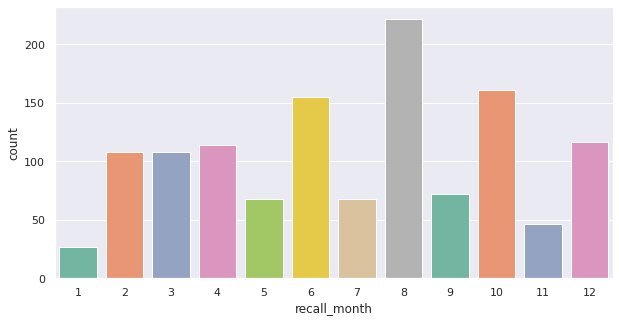

In [94]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
ax = sns.countplot(x="recall_month", data=df, palette="Set2")
plt.show()

---

#### 제조사 비엠더블유코리아(주)에서 가장 많이 리콜 요청된 모델의 이름<br>
모델별로 얼마나 발생했는지 계산<br>
df[df['manufacturer']=='비엠더블유코리아(주)'].groupby('model')['cause'].count()
* & 정렬<br>
.reset_index().sort_values(by=['cause'], ascending=Fasle)

In [85]:
bmw_re = df[df['manufacturer']=='비엠더블유코리아(주)'].groupby('model')
bmw_re

In [88]:
bmw_re = df[df['manufacturer']=='비엠더블유코리아(주)'].groupby('model')
bmw_re.count().head(2)

,manufacturer,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
model,,,,,,,,,,,
BMW 118d,6,6,6,6,6,6,6,6,6,6,6
BMW 120d,6,6,6,6,6,6,6,6,6,6,6


In [89]:
df[df['manufacturer']=='비엠더블유코리아(주)'].groupby('model')['cause'].count().reset_index()

,model,cause
0,BMW 118d,6
1,BMW 120d,6
2,BMW 220d,1
3,BMW 220d Coupe,5
4,BMW 3125Ci,1
...,...,...
147,MINI Cooper SD Coupe,3
148,MINI Cooper SD Paceman,3
149,MINI Cooper SD Paceman ALL4,3
150,MINI Cooper SD five-door,2


In [90]:
df[df['manufacturer']=='비엠더블유코리아(주)'].groupby('model')['cause'].count().reset_index().sort_values(by=['cause'], ascending=False)

,model,cause
11,BMW 320d,15
44,BMW 520d,15
93,BMW X3 xDrive20d,11
46,BMW 520d xDrive,10
14,BMW 320d Gran Turismo,9
...,...,...
124,BMW X7 M50i,1
23,BMW 325I,1
66,BMW 740d,1
127,BMW X7 xDrive40i,1


In [91]:
bmw_count = df[df['manufacturer']=='비엠더블유코리아(주)'].groupby('model')['cause'].count().reset_index().sort_values(by=['cause'], ascending=False)

In [92]:
bmw_count.rename(columns= {'cause':'count'})

,model,count
11,BMW 320d,15
44,BMW 520d,15
93,BMW X3 xDrive20d,11
46,BMW 520d xDrive,10
14,BMW 320d Gran Turismo,9
...,...,...
124,BMW X7 M50i,1
23,BMW 325I,1
66,BMW 740d,1
127,BMW X7 xDrive40i,1


---

### 3.4. 생산연도별 리콜 현황 출력

이번에는 생산연도별 리콜 현황을 꺾은선 그래프로 알아보겠습니다.

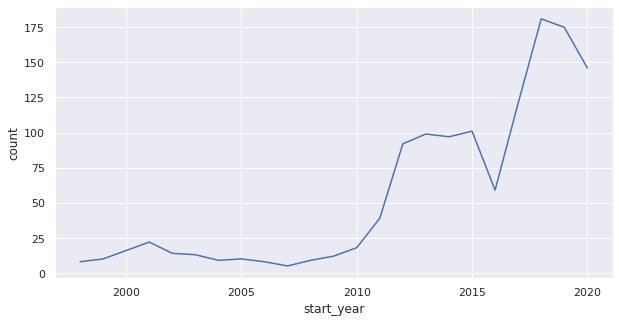

In [95]:
tmp = pd.DataFrame(df.groupby("start_year").count()["model"]).rename(columns={"model": "count"}).reset_index()

# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
sns.lineplot(data=tmp, x="start_year", y="count")
plt.show()

In [96]:
tmp

,start_year,count
0,1998,8
1,1999,10
2,2000,16
3,2001,22
4,2002,14
5,2003,13
6,2004,9
7,2005,10
8,2006,8
9,2007,5


####  2020년에 리콜 개시가 가장 많이 일어난 달(month)과 가장 적게 일어난 달의 차이(건수)

In [100]:
tmp = pd.DataFrame(df.groupby("recall_month").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"})

In [101]:
tmp.iloc[0]["count"]-tmp.iloc[-1]["count"]

194

In [115]:
tmp["count"].iloc[0]-tmp["count"].iloc[-1]

194

In [113]:
pd.DataFrame(df.groupby('recall_month').count()['model'].sort_values(ascending=False)).rename(columns={'model':'count'}).iloc[0]['count']

221

In [114]:
pd.DataFrame(df.groupby('recall_month').count()['model'].sort_values(ascending=False)).rename(columns={'model':'count'}).iloc[-1]['count']

27

In [149]:
tmp = pd.DataFrame(df.groupby("recall_month").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"})
tmp

,count
recall_month,
8,221
10,161
6,155
12,116
4,114
2,108
3,108
9,72
5,68


In [150]:
# index로 인식되는 recall_month를 columns로 
tmp = tmp.reset_index()
tmp

,recall_month,count
0,8,221
1,10,161
2,6,155
3,12,116
4,4,114
5,2,108
6,3,108
7,9,72
8,5,68
9,7,68


In [151]:
tmp['recall_month'] # columns로 인식되고 있는지 확인

0      8
1     10
2      6
3     12
4      4
5      2
6      3
7      9
8      5
9      7
10    11
11     1
Name: recall_month, dtype: int64

In [152]:
tmp['count'].max() - tmp['count'].min()

194

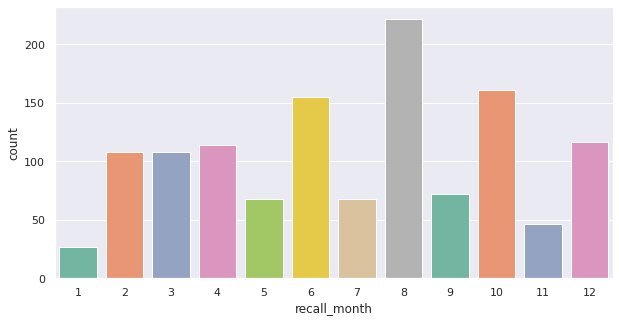

In [155]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
ax = sns.countplot(x="recall_month", data=df, palette="Set2")
plt.show()

### 3.5. 4분기 제조사별 리콜 현황 출력

가장 최근 데이터인 2020년 4분기(10, 11, 12월) 제조사별 리콜 현황을 시각화
> df[df.특정 조건] = 조건을 만족하는 row만 불러옴

In [118]:
# 논리연산을 이용한 조건을 다음과 같이 사용하면 해당 조건에 맞는 데이터를 출력할 수 있다.
df[df.recall_month.isin([10,11,12])].head(3)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
439,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
443,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
447,비엠더블유코리아(주),BMW 320d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,28,2015,6,30,2020,10,1


#### Step by step

* 하나짜리 였을 때

In [121]:
flag_s = df['recall_month'] ==3 # df[df['recall_month'] ==3].head(3)
flag_s[0:5]

0     True
1     True
2    False
3    False
4    False
Name: recall_month, dtype: bool

In [122]:
df[flag_s].head(3)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
135,(주) 다빈월드,HJ100T-7C,배기량 변경으로 제원 정정을 하는 과정에서 담당자의 실수로 최고출력을 잘못 기재하여...,2016,8,24,2017,12,20,2020,3,2


In [123]:
df.head(2)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23


In [124]:
df.recall_month[0:5]

0    3
1    3
2    1
3    1
4    1
Name: recall_month, dtype: int64

In [125]:
df.recall_month.isin([2,3])[0:5]

0     True
1     True
2    False
3    False
4    False
Name: recall_month, dtype: bool

In [126]:
df[df.recall_month.isin([2,3])].head(2)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23


#### 그럼 2개 이상일 때는 flag series로는...?!
* Series or Series

In [132]:
flag_s = (df['recall_month']==2) | (df['recall_month']==3)
flag_s[0:5]

0     True
1     True
2    False
3    False
4    False
Name: recall_month, dtype: bool

In [133]:
df[flag_s].head(5) # recall_month ==2 or ==3 모두 출력

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
29,아우디폭스바겐코리아(주),Golf 1.4 TSI,"특정 기간 내에 특정 공급 업체(Jedenak;이드낙)의 생산 공정 불량으로 인해,...",2010,12,1,2012,5,3,2020,2,28
30,아우디폭스바겐코리아(주),Golf 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(Jedenak;이드낙)의 생산 공정 불량으로 인해,...",2010,8,5,2016,11,5,2020,2,28
31,아우디폭스바겐코리아(주),Jetta 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(Jedenak;이드낙)의 생산 공정 불량으로 인해,...",2011,5,26,2012,9,28,2020,2,28


---

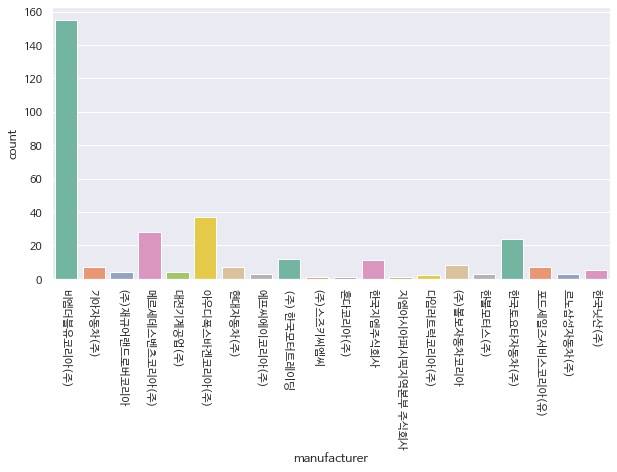

In [135]:
# 그래프를 출력
plt.figure(figsize=(10,5))
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="manufacturer", data=df[df.recall_month.isin([10,11,12])], palette="Set2")
plt.xticks(rotation=270)
plt.show()

### 3.6. 하반기 생산연도별 리콜 현황 출력

이번에는 2020년 하반기(7~12월)에 개시된 리콜 건들을 생산 개시 연도를 기준으로 시각화해봅시다.

In [156]:
# 해당 column을 지정하여 series 형태로 출력
df[df.recall_month>=7].head()

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
437,비엠더블유코리아(주),BMW 118d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,2,2019,4,29,2020,8,1
439,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
441,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,13,2015,4,15,2020,8,1
443,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
445,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2014,10,16,2015,2,25,2020,8,1


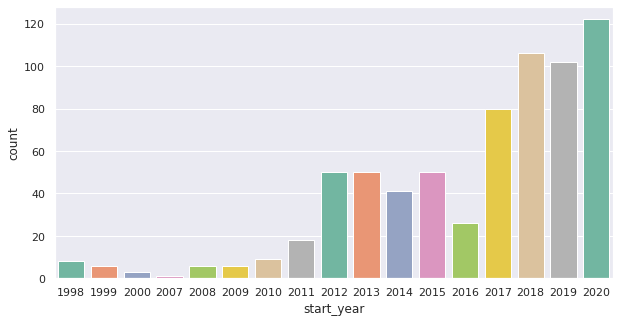

In [157]:
# 그래프를 출력 # 하반기 7 ~ 12
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="start_year", data=df[df.recall_month>=7], palette="Set2")
plt.show()

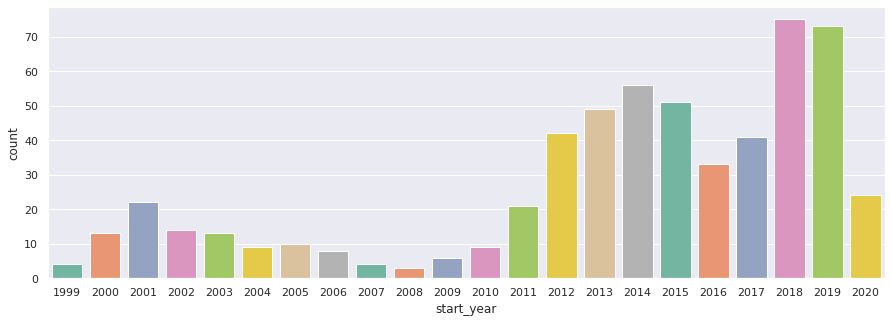

In [173]:
# 그래프를 출력 # 상반기 1 ~ 6
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="start_year", data=df[df.recall_month<7], palette="Set2")
plt.show()

### 3.7. 워드 클라우드를 이용한 리콜 사유 시각화

워드 클라우드를 이용하여 리콜 사유를 시각화

In [158]:
df.head(1)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23


In [159]:
df.cause #비정형 데이터

0       스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1       스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2       콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...
3       뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...
4       뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...
                              ...                        
1270                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1271                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1272                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1273                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1274                           프로펠러 샤프트의 내구성이 저하될 수 있습니다.
Name: cause, Length: 1264, dtype: object

In [160]:
# 워드 클라우드 생성을 도와주는 패키지
try:
    from wordcloud import WordCloud, STOPWORDS
except:
    !pip install wordcloud
    from wordcloud import WordCloud, STOPWORDS

     |████████████████████████████████| 371 kB 1.6 MB/s eta 0:00:01


In [161]:
# 문법적인 성분들을 배제하기 위해 stopwords들을 따로 저장
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

> STOPWORDS : 유의미한 시각화를 위해, 문법적인 성분에 해당하는 언어들을 배제해주기 위한 집합

한국어를 사용할 때 적합한 stopwords 입력

In [162]:
# 손으로 직접 리콜 사유와 관련이 적은 문법적 어구들을 배제해보겠습니다.
spwords = set(["동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

In [164]:
df['cause'].duplicated()

0       False
1        True
2       False
3       False
4        True
        ...  
1270    False
1271     True
1272     True
1273     True
1274     True
Name: cause, Length: 1264, dtype: bool

In [165]:
# 리콜 사유에 해당하는 열의 값들을 중복 제거한 뒤 모두 이어붙여서 text라는 문자열로 저장합니다.
text = ""

for c in df.cause.drop_duplicates():
    text += c

text[:100]

'스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑 & 고) 2) 결함 원인 : 오토 스타트 결함(스탑&고 작동 시 재시동 불가 현상)은 과도한 전'

In [167]:
text[:1000] # 1000번째까지 사유가 문자열로 붙게됨

'스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑 & 고) 2) 결함 원인 : 오토 스타트 결함(스탑&고 작동 시 재시동 불가 현상)은 과도한 전압강하로 인해 발생되며 이는 충분한 전류량이 흐를 수 없는 불충분한 엔진 배선 및 주 양극 배선 사이즈로 인해 유발됨콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품 내부에 균열이 발생할 가능성이 있음.뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부의 스프링이 바르게 장착 되지 않았을 가능성이 있음. *시트벨트 리트랙터 잠금장치: 급정지나 충격이 있을 경우 또는 시트벨트가 빠르게 당겨질 경우에 시트벨트가 풀어지지 않게 잠그는 장치비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 운행조건에서 크랭크축이 파손될 수 있는 가능성이 확인되었습니다.사이드 스탠드 제조 공정상 용접 불량으로 사이드 스탠드의 용접 부위가 부러질 수 있음. (#참고 사항 : 2019년식 이후 모델에 장착된 사이드 스탠드는 공급사가 바뀌면서 이와 같은 문제 없음)2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8 Competition 모델 중 171대 차량의 변속기 배선 고정 공정 과정에서 배선을 고정하는 클립을 잘 못 장착하여 고정된 위치가 과도한 압착 및 변속기 등 주변에서 발생하는 열에 영향을 받아 배선이 단락 될 수 있습니다.2017년식 Explorer 차량의 전동시트(파워시트) 프레임 트랙의 가장자리에 날카로운 마무리가 남아있을 수 있습니다. 이렇게, 시트 프레임 트랙의 날카로운 마무리로 인하여, 앞좌석과 콘솔 사이에 손을 넣으면 다칠 수 있는 위험이 있기 때문에 이를 예방하기 위해 제작결함을 시정하고자 함2015-2018년식 Mondeo 차량은 시간이 지남에 따라 배터리 음극(-)단자 주변에 황산구리가 생성될 수 있으며, 생성된 황산구리로 인하여 배터리 모니터링 센서 하단부

워드 클라우드를 생성하고 시각화

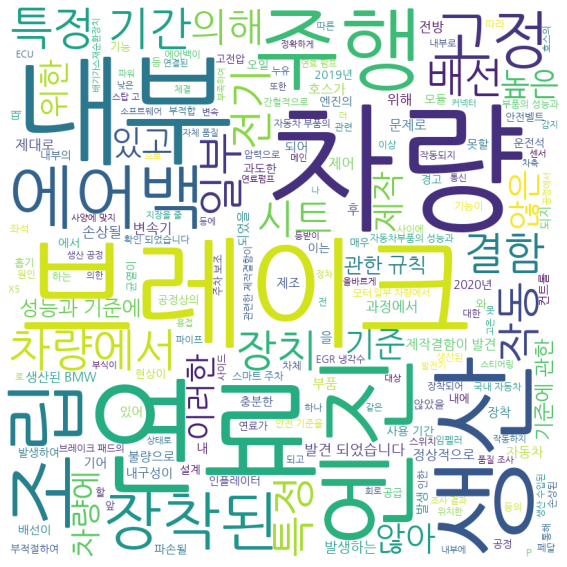

In [166]:
# 한글을 사용하기 위한 폰트
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

> 주로 어떤 사유로 인해 리콜되는지 개괄적인 파악이 가능

#### 기아자동차(주)의 제품 중 가장 최근에 리콜이 개시된 제품의 모델명

In [174]:
df[df['manufacturer']=='기아자동차(주)'].sort_values(by=['recall_year','recall_month','recall_day'],ascending=False).iloc[0]

manufacturer                                             기아자동차(주)
model                                                  쏘울(SK3) EV
cause           IEB 모터 제어 로직의 Fail Safe(고장안전대책) 로직 구성 미흡 * Fai...
start_year                                                   2019
start_month                                                     2
start_day                                                      19
end_year                                                     2020
end_month                                                      11
end_day                                                        13
recall_year                                                  2020
recall_month                                                   12
recall_day                                                     10
Name: 1204, dtype: object

In [177]:
df[df['manufacturer']=='기아자동차(주)'].sort_values(by=['recall_year','recall_month','recall_day'],ascending=False)['model'].iloc[0]
# df[df['manufacturer']=='기아자동차(주)'].sort_values(by=["recall_year", "recall_month", "recall_day"], ascending=False).iloc[0]['model']

'쏘울(SK3) EV'

---

In [189]:
df[df['manufacturer']=='비엠더블유코리아(주)'].sort_values(by=['model'], ascending=False).count().iloc[0]

527

In [190]:
df[df['manufacturer']=='비엠더블유코리아(주)'].sort_values(by=['model'], ascending=False).iloc[0]['model']

'Rolls Royce Phantom'

In [191]:
df[df['manufacturer']=='비엠더블유코리아(주)'].sort_values(by=['model'], ascending=False).iloc[0]['cause']

'‘자동차 및 자동차부품의 성능과 기준에 관한 규칙’ 제40조의3(주차등) 조항에 따르면, 길이가 600센티미터 이하, 너비가 200센티미터 이하인 자동차에 주차등 설치를 허용하고 있으며, 설치 하려는 때에는 별표6의32 기준을 충족할 것을 요구하고 있습니다. 그리고 동 규칙 제47조 제3항에 따르면, 제40조의3에 규정되지 아니한 등화나 반사기 등을 설치하는 것은 금지되고 있습니다. *주차등: 이면도로 등에 주차된 차량의 추돌사고 등을 방지하기 위한 목적으로 차량의 위치를 알리고자 주차 후 좌측 또는 우측의 후미등을 켤 수 있도록 하는 기능'

 ---